Definir:
1 - Evolução quantitativa de clientes ativos por mês
2 - Classificar os clientes por volume e frequencia de compra.
3 - O que cada cliente compra e com que frequência.
4 - Evolução dos produtos Oferecidos
5 - Classificar produtos por tipo.Varios produtos identicos com códigos diferentes em função da embalagem
6 - Análise geográfica x volume x produto

In [2]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define Moeda Brasileira numeros R$ 1.000,00
locale.setlocale( locale.LC_ALL, '' )
#locale.currency( g, grouping = True )

'Portuguese_Brazil.1252'

In [3]:
#locale.currency( g, grouping = True )

In [4]:
from numpy.random import randn
#np.random.seed(101)

In [5]:
#pd.options.display.float_format = 'R${:,.2f}'.format

In [7]:
# Abre o dataset
df = pd.read_csv('C:/Mettricx/Projetos/SFoods/dataset/SFoods_Clientes_Classificacao.csv', dtype={'cod': object, 'NF': object, 'CNPJ': object})


In [8]:
df.head()

,CNPJ,TotCompras,percenTotal,NumCompras,Percentual
0,12360891000176,474946.97,4.130,26,0.394
1,15116388000168,367559.08,3.196,23,0.349
2,12434859000198,350649.19,3.049,134,2.031
3,29840154000173,298708.56,2.598,72,1.091
4,19068286000175,281812.84,2.451,68,1.030


#### it will be used the number of cash register to help define the Customer's size

In [9]:
# As at this time we don't have the real number, 
# it will be defined based on the amount of sales
def numCaixas(xVal):
    from random import randint
    if xVal <= 1274.327500:
       
        numCaixas = randint(1, 2)
    elif xVal <=  3822.770000:
        numCaixas = randint(3, 6)
    elif xVal <=  14755.912500:  
        numCaixas = randint(7, 15)
    else:
        numCaixas = randint(15, 20)
    return numCaixas    


In [11]:
df['numCaixas'] = df['TotCompras'].apply(numCaixas)

In [12]:
df.head(15)

,CNPJ,TotCompras,percenTotal,NumCompras,Percentual,numCaixas
0,12360891000176,474946.97,4.130,26,0.394,17
1,15116388000168,367559.08,3.196,23,0.349,16
2,12434859000198,350649.19,3.049,134,2.031,18
3,29840154000173,298708.56,2.598,72,1.091,20
4,19068286000175,281812.84,2.451,68,1.030,16
5,17339293000139,211326.79,1.838,141,2.137,17
6,39508023000228,179723.79,1.563,54,0.818,20
7,27833615001984,160547.14,1.396,48,0.727,18
8,05565335000170,153595.80,1.336,67,1.015,20
9,09653290000147,153414.64,1.334,47,0.712,15


In [13]:
indice = df.index.values.tolist()

In [15]:
len(df)

673

#### Geographical location of Customers

In [67]:
#cidades = pd.DataFrame(data = info, columns=['ID','LATITUDE','LONGITUDE','cidade','UF','Valor'], dtype = {'ID': object, 'LATITUDE': float, 'LONGITUDE': float, 'cidade': object, 'UF': object, 'Valor': float}).reset_index(drop=True)

In [16]:
cidades = pd.read_csv('C:/Mettricx/Projetos/SFoods/dataset/MunicipiosBrasil.csv', names=['id','latitude','longitude','cidade','UF','Valor'],encoding = 'utf8')
# ,sep=';',names=['ID','LATITUDE','LONGITUDE','cidade','UF','Valor'],
#                      dtype = {'ID': object, 'LATITUDE': object, 'LONGITUDE': object, 'cidade': object, 'UF': object, 'Valor': object}

In [17]:
cidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 6 columns):
id           5509 non-null int64
latitude     5509 non-null float64
longitude    5509 non-null float64
cidade       5509 non-null object
UF           5509 non-null object
Valor        5509 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 258.3+ KB


In [18]:
cidades.drop(['id'],axis = 1, inplace = True)

In [20]:
cidades.head()

,latitude,longitude,cidade,UF,Valor
0,-9.82,-66.88,ACRELANDIA,AC,39560.03891
1,-10.94,-69.56,ASSIS BRASIL,AC,17842.15099
2,-11.01,-68.74,BRASILEIA,AC,93373.39431
3,-9.83,-67.95,BUJARI,AC,28516.56749
4,-10.57,-67.67,CAPIXABA,AC,18886.45514


In [30]:
clientes = pd.read_csv('C:/Mettricx/Projetos/SFoods/DataSet/SFoods_Clientes.csv', dtype={ 'CNPJ': object})

In [31]:
clientes.head()

,CNPJ,cliente,UF,cidade,bairro
0,07394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS
2,09190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA
3,35994433000275,MERCADO HORTICAXIXE LTDA EPP,ES,ARACRUZ,BARRA DO RIACHO
4,08357136000165,SUPERMERCADO VALLIN LTDA,ES,ARACRUZ,BARRA DO SAHY


In [32]:
s1 = pd.merge(clientes,cidades , on=['cidade','UF'])

In [33]:
s1 = s1.sort_values(by=['UF','cidade','cliente'],ascending=True, na_position='first').reset_index(drop=True)

In [34]:
s1.head()

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor
0,07394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382
2,09190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093
3,31759699000444,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203
4,31759699000363,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203


In [35]:
Supra_Cli = pd.merge(s1,df , on=['CNPJ'])

In [36]:
Supra_Cli.head()

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor,TotCompras,percenTotal,NumCompras,Percentual,numCaixas
0,07394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617,679.44,0.006,1,0.015,1
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382,886.80,0.008,1,0.015,2
2,09190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093,668.00,0.006,2,0.030,2
3,31759699000444,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203,1350.46,0.012,3,0.045,6
4,31759699000363,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203,4533.71,0.039,6,0.091,15


In [37]:
Supra_Cli = Supra_Cli.sort_values(by=['UF','cidade','cliente'],ascending=True, na_position='first').reset_index(drop=True)

In [38]:
Supra_Cli.head()

,CNPJ,cliente,UF,cidade,bairro,latitude,longitude,Valor,TotCompras,percenTotal,NumCompras,Percentual,numCaixas
0,07394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617,679.44,0.006,1,0.015,1
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382,886.80,0.008,1,0.015,2
2,09190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093,668.00,0.006,2,0.030,2
3,31759699000444,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203,1350.46,0.012,3,0.045,6
4,31759699000363,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203,4533.71,0.039,6,0.091,15


In [39]:
Supra_Cli.to_csv('C:/Mettricx/Projetos/SFoods/DataSet/SFoods_Cli_Features.csv',encoding='utf-8', index=False)

In [40]:
Supra_Cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 13 columns):
CNPJ           655 non-null object
cliente        655 non-null object
UF             655 non-null object
cidade         655 non-null object
bairro         655 non-null object
latitude       655 non-null float64
longitude      655 non-null float64
Valor          655 non-null float64
TotCompras     655 non-null float64
percenTotal    655 non-null float64
NumCompras     655 non-null int64
Percentual     655 non-null float64
numCaixas      655 non-null int64
dtypes: float64(6), int64(2), object(5)
memory usage: 66.6+ KB


In [41]:
Supra_Cli.drop(['CNPJ'],axis = 1, inplace = True)

In [42]:
Supra_Cli.head()

,cliente,UF,cidade,bairro,latitude,longitude,Valor,TotCompras,percenTotal,NumCompras,Percentual,numCaixas
0,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA,-17.89,-39.37,184301.3617,679.44,0.006,1,0.015,1
1,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS,-17.34,-39.22,157085.2382,886.80,0.008,1,0.015,2
2,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA,-20.79,-40.65,111105.3093,668.00,0.006,2,0.030,2
3,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL,-19.82,-40.27,392874.5203,1350.46,0.012,3,0.045,6
4,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO,-19.82,-40.27,392874.5203,4533.71,0.039,6,0.091,15


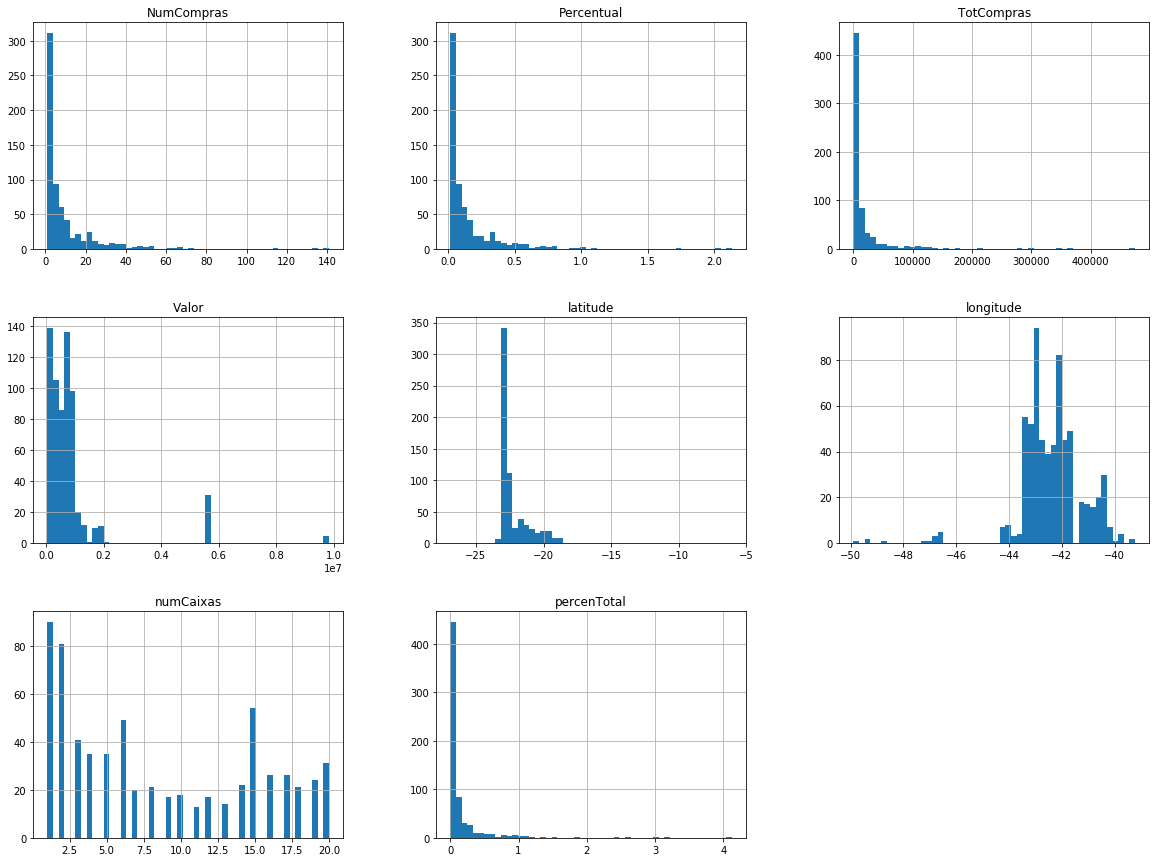

In [43]:
import matplotlib.pyplot as plt
Supra_Cli.hist(bins=50, figsize=(20,15))
plt.show()